In [9]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

df_comp = pd.read_csv('ready_to_compare.csv')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import seaborn as sns

def calculate_metrics(predicted, reference):

    rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    bleu_scores = []
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

    for pred, ref in zip(predicted, reference):
        # BLEU
        bleu_score = sentence_bleu([ref.split()], pred.split())
        bleu_scores.append(bleu_score)

        # ROUGE
        scores = rouge.score(ref, pred)
        for key in rouge_scores.keys():
            rouge_scores[key].append(scores[key].fmeasure)

    # Średnie wyniki
    metrics = {
        'bleu': np.mean(bleu_scores),
        'rouge1': np.mean(rouge_scores['rouge1']),
        'rouge2': np.mean(rouge_scores['rouge2']),
        'rougeL': np.mean(rouge_scores['rougeL']),
    }
    return metrics, bleu_scores, rouge_scores

def plot_metrics_distributions(bleu_scores, rouge_scores):

    plt.figure(figsize=(15, 10))

    # BLEU Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(bleu_scores, bins=10, kde=True, color='blue')
    plt.title('Distribution of BLEU Scores')
    plt.xlabel('BLEU Score')
    plt.ylabel('Frequency')

    # ROUGE-1 Histogram
    plt.subplot(2, 2, 2)
    sns.histplot(rouge_scores['rouge1'], bins=10, kde=True, color='green')
    plt.title('Distribution of ROUGE-1 Scores')
    plt.xlabel('ROUGE-1 Score')
    plt.ylabel('Frequency')

    # ROUGE-2 Histogram
    plt.subplot(2, 2, 3)
    sns.histplot(rouge_scores['rouge2'], bins=10, kde=True, color='orange')
    plt.title('Distribution of ROUGE-2 Scores')
    plt.xlabel('ROUGE-2 Score')
    plt.ylabel('Frequency')

    # ROUGE-L Histogram
    plt.subplot(2, 2, 4)
    sns.histplot(rouge_scores['rougeL'], bins=10, kde=True, color='purple')
    plt.title('Distribution of ROUGE-L Scores')
    plt.xlabel('ROUGE-L Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [11]:
df_comp.head()

,Unnamed: 0,text,summary,bart_summary,w2v_summary
0,0,"If you consider flying one of life’s miseries, you might be flying the wrong airline.\n\nA new survey suggests that air travel is slowly improving, led by a small group of airlines.\n\nPassengers ...",J.D. Power's latest North America Airline Satisfaction study finds customer service is improving -- if you fly a small group of airlines.,"If you consider flying one of life’s one of life’s miseries, you might be flying one of life’s miseries, you might be flying the wrong airline.","If you consider flying one of life’s miseries, you might be flying the wrong airline."
1,1,"The Consumer Financial Protection Bureau is demanding PayPal return $15 million to consumers and pay a $10 million fine for problems with its PayPal Credit service, according to a new federal cour...",The CFPB alleges many customers unwittingly signed up for PayPal Credit,"The Consumer Financial Protection Bureau is demanding PayPal return $15 million to consumers and pay a $10 million fine for problems with its PayPal Credit service, according to a new federal cour...","One big problem, the bureau claims, is that PayPal set the default payment method for all purchases to PayPal Credit, formerly named “Bill Me Later.”\n\nAnd even for those customers who signed up ..."
2,2,"South Korea has accused North Korea of planting landmines that maimed two soldiers on border patrol, sending military tensions on the Korean peninsula soaring as it threatened to make Pyongyang pa...",South Korea has threatened to retaliate after accusing North Korea of planting a mine that maimed two soldiers last week.,"South Korea has accused North Korea of planting landmines that maimed two soldiers on border patrol, sending military tensions on the Korean peninsula soaring as it threatened to make Pyongyang pa...","South Korea has accused North Korea of planting landmines that maimed two soldiers on border patrol, sending military tensions on the Korean peninsula soaring as it threatened to make Pyongyang pa..."
3,3,"The credit card you have in your wallet to save on gas may hurt you when you're not at the pump.\n\nGas station-branded credit cards charge an average interest rate of 24 percent, according to a n...",A new survey finds gas station-branded credit cards charge the highest interest rates on average.,The credit card you have in your wallet to save on gas may hurt you when you have in your wallet to save on gas may hurt you when you when you're not at the pump.,"The typical gas card offers a 10-cent discount per gallon, which works out to a 4 percent return based on current prices."
4,4,"It's not just Japan, either. In Malaysia, the Bone & Pot steamboat restaurant (Yau Guat Hei), sells a signature dish called ""Collagen Soup,"" using cubes of collagen jelly shipped from Japan, which...","Suntory, has launched “Precious,"" a light beer targeted predominantly at women. Yet this drink has a secret ingredient: collagen.",canine collagen.,"It's not just Japan, either."


In [12]:
predicted_bart = df_comp['bart_summary']
predicted_w2v = df_comp['w2v_summary']
reference_summaries = df_comp['summary']

metrics_bart = calculate_metrics(predicted_bart, reference_summaries)
print("BART Metrics:", metrics_bart)

metrics_w2v = calculate_metrics(predicted_w2v, reference_summaries)
print("Word2Vec Metrics:", metrics_w2v)


C:\Users\48798\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\48798\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\48798\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-pa

BART Metrics: ({'bleu': 0.14795498827302037, 'rouge1': 0.36678414044450286, 'rouge2': 0.22702084881303433, 'rougeL': 0.3185276623951115}, [9.594503055152632e-232, 3.700592241674297e-155, 0.1834283688193615, 1.0518351895246305e-231, 3.1170784199608393e-235, 9.788429383461836e-232, 3.8138907759550345e-155, 0.7170451440930211, 1.0, 0.5069487414732323, 0.7160350546947921, 0.1334088950496264, 4.927224994977926e-155, 4.467524188206152e-155, 1.012071042130996e-231, 3.1770419500663857e-78, 8.510469113101058e-232, 8.81787932857899e-232, 0.898397321348071, 3.9731938915999775e-155, 0.10942613755620274, 0.27173078761839214, 3.794461604366858e-155, 6.338778446616093e-155, 3.163770396309563e-155, 0, 0.6880908437029064, 0, 4.3521358589488775e-155, 7.077700432673662e-232, 4.023062361861117e-155, 1.0244914152188952e-231, 9.50440384721771e-232, 9.594503055152632e-232, 2.66669249540442e-78, 0.6910621773335011, 0, 0.5512003357447272, 4.234401506515187e-155, 5.554837769749797e-155, 1.0, 5.175590928920413e-

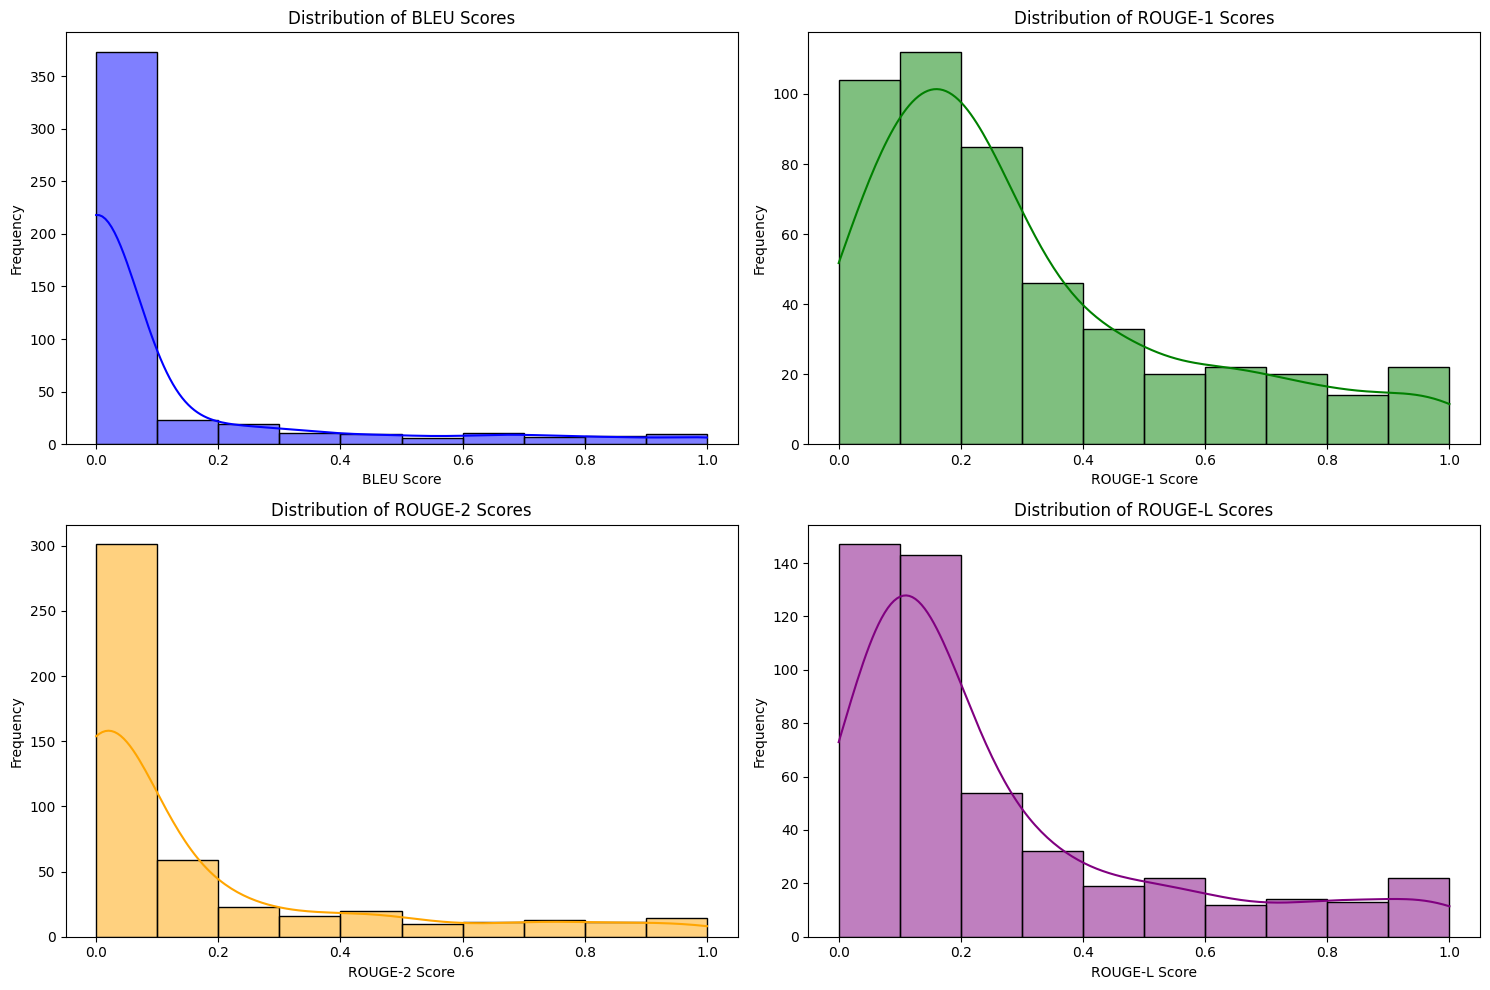

In [13]:
metrics, bleu_scores, rouge_scores = calculate_metrics(predicted_w2v, reference_summaries)

df_comp['rouge1_w2v'] = np.array(rouge_scores['rouge1'])
df_comp['rouge2_w2v'] = np.array(rouge_scores['rouge1'])
df_comp['rougeL_w2v'] = np.array(rouge_scores['rouge1'])
df_comp['bleu_w2v'] = np.array(bleu_scores)

plot_metrics_distributions(bleu_scores, rouge_scores)

C:\Users\48798\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\48798\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\48798\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-pa

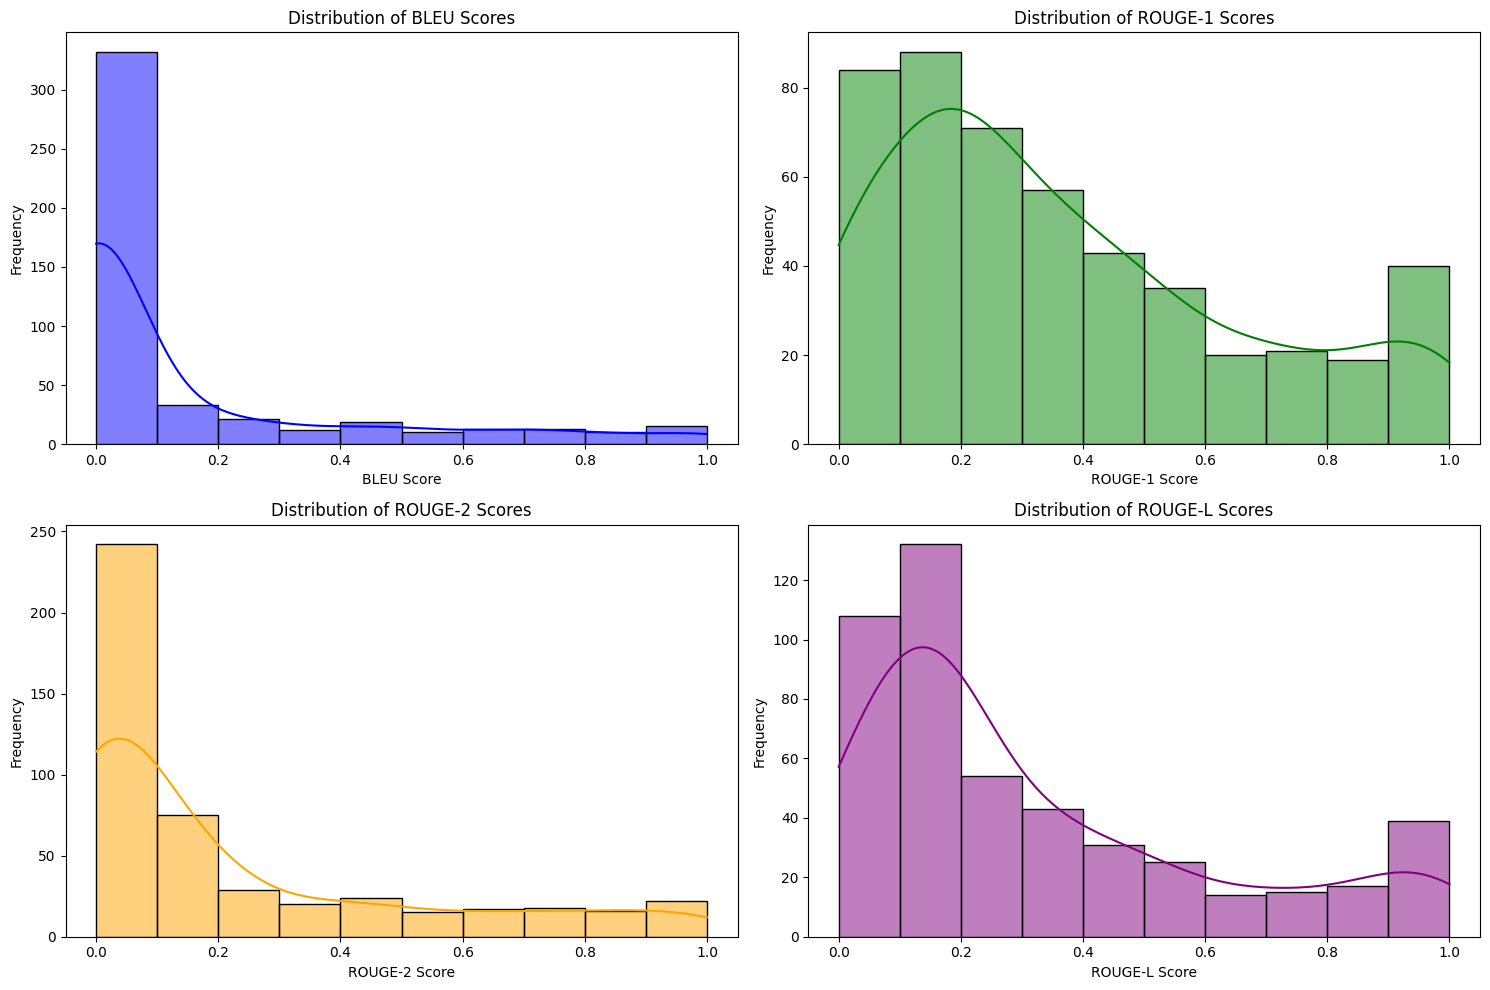

In [14]:
metrics, bleu_scores, rouge_scores = calculate_metrics(predicted_bart, reference_summaries)
df_comp['rouge1_bart'] = np.array(rouge_scores['rouge1'])
df_comp['rouge2_bart'] = np.array(rouge_scores['rouge1'])
df_comp['rougeL_bart'] = np.array(rouge_scores['rouge1'])
df_comp['bleu_bart'] = np.array(bleu_scores)
plot_metrics_distributions(bleu_scores, rouge_scores)

In [15]:
pd.set_option('display.max_colwidth', 200)
df_comp[df_comp['rougeL_bart'] > 0.4].head(20)

,Unnamed: 0,text,summary,bart_summary,w2v_summary,rouge1_w2v,rouge2_w2v,rougeL_w2v,bleu_w2v,rouge1_bart,rouge2_bart,rougeL_bart,bleu_bart
2,2,"South Korea has accused North Korea of planting landmines that maimed two soldiers on border patrol, sending military tensions on the Korean peninsula soaring as it threatened to make Pyongyang pa...",South Korea has threatened to retaliate after accusing North Korea of planting a mine that maimed two soldiers last week.,"South Korea has accused North Korea of planting landmines that maimed two soldiers on border patrol, sending military tensions on the Korean peninsula soaring as it threatened to make Pyongyang pa...","South Korea has accused North Korea of planting landmines that maimed two soldiers on border patrol, sending military tensions on the Korean peninsula soaring as it threatened to make Pyongyang pa...",0.555556,0.555556,0.555556,1.834284e-01,0.555556,0.555556,0.555556,1.834284e-01
7,7,"BRIDGEWATER, Mass. (WCVB) -- A Bridgewater family wrote an impassioned and poignant obituary for their son, who died of a heroin overdose.\n\nBill Scannell lost his son, Emmett, to a heroin overdo...","A Bridgewater, Conn., family wrote an impassioned and poignant obituary for their son, who died of a heroin overdose.","BRIDGEWATER, Mass. (WCVB) -- A Bridgewater family wrote an impassioned and poignant obituary for their son, who died of a heroin overdose.","BRIDGEWATER, Mass.",0.095238,0.095238,0.095238,0.000000e+00,0.900000,0.900000,0.900000,7.170451e-01
8,8,"Playboy's first non-nude issue has been on sale for the past month, and the media empire claims its re-robed strategy is working with advertisers.\n\nThe 63-year-old magazine's March issue feature...","Playboy's first non-nude issue has been on sale for the past month, and the media empire claims its re-robed strategy is working with advertisers.","Playboy's first non-nude issue has been on sale for the past month, and the media empire claims its re-robed strategy is working with advertisers.","Maxim also cut its ad rate base to 900,000 from 2 million in October.",0.047619,0.047619,0.047619,4.610690e-232,1.000000,1.000000,1.000000,1.000000e+00
9,9,"A man armed with a rifle has killed four people in a rampage in Girona province, north-east Spain, police say.\n\nThe gunman walked into a bar in the town of Olot, 120km (70 miles) north of Barcel...","A man armed with a rifle kills four people in a shooting rampage in north-east Spain, police say.","A man armed with a rifle has killed four people in a rampage in Girona province, north-east Spain, police say.","A man armed with a rifle has killed four people in a rampage in Girona province, north-east Spain, police say.",0.900000,0.900000,0.900000,5.069487e-01,0.900000,0.900000,0.900000,5.069487e-01
10,10,You know that it’s gotten bad when Dan Rather and Joe Scarborough agree on something.\n\nBoth of the TV journalists (could either one be even be considered a “journalist” anymore?) were in rare ag...,You know that it’s gotten bad when Dan Rather and Joe Scarborough agree on something.,You know that it’s gotten bad when Dan Rather and Joe Scarborough and Dan Rather agree on something.,You know that it’s gotten bad when Dan Rather and Joe Scarborough agree on something.,1.000000,1.000000,1.000000,1.000000e+00,0.914286,0.914286,0.914286,7.160351e-01
11,11,"A 60-year-old man will go to trial over an alleged sex attack on two backpackers at a remote beach southeast of Adelaide.\n\nThe man, whose identity is concealed by suppression orders, pleaded not...",A man has entered not guilty pleas to all offences related to the alleged attack on two backpackers southeast of Adelaide earlier this year.,A 60-year-old man will go to trial over an alleged sex attack on two backpackers at a remote beach southeast of Adelaide.,"But Ms Attar successfully applied for his identity to remain concealed in the ""interests of the proper administration of justice"".",0.136364,0.136364,0.136364,9.282656e-232,0.50000

In [16]:
# Definicja progu
thresholds = [0.5, 0.75, 0.95]

# Kolumny, dla których chcemy obliczyć procent obserwacji
metrics = ['rouge1', 'rouge2', 'rougeL', 'bleu']
models = ['_w2v', '_bart']

# Iteracja po metrykach i modelach
for t in thresholds:
    for metric in metrics:
        for model in models:
            col_name = f"{metric}{model}"
            percentage = 100 * (df_comp[df_comp[col_name] > t].shape[0] / df_comp.shape[0])
            print(f"Procent obserwacji, gdzie {col_name} osiąga wartości wyższe niż {t}: {np.round(percentage, 2)}%")
        print('\n')
    print('-------------------------------------------------------------')

Procent obserwacji, gdzie rouge1_w2v osiąga wartości wyższe niż 0.5: 20.08%
Procent obserwacji, gdzie rouge1_bart osiąga wartości wyższe niż 0.5: 27.62%


Procent obserwacji, gdzie rouge2_w2v osiąga wartości wyższe niż 0.5: 20.08%
Procent obserwacji, gdzie rouge2_bart osiąga wartości wyższe niż 0.5: 27.62%


Procent obserwacji, gdzie rougeL_w2v osiąga wartości wyższe niż 0.5: 20.08%
Procent obserwacji, gdzie rougeL_bart osiąga wartości wyższe niż 0.5: 27.62%


Procent obserwacji, gdzie bleu_w2v osiąga wartości wyższe niż 0.5: 8.79%
Procent obserwacji, gdzie bleu_bart osiąga wartości wyższe niż 0.5: 12.76%


-------------------------------------------------------------
Procent obserwacji, gdzie rouge1_w2v osiąga wartości wyższe niż 0.75: 9.62%
Procent obserwacji, gdzie rouge1_bart osiąga wartości wyższe niż 0.75: 13.81%


Procent obserwacji, gdzie rouge2_w2v osiąga wartości wyższe niż 0.75: 9.62%
Procent obserwacji, gdzie rouge2_bart osiąga wartości wyższe niż 0.75: 13.81%


Procent obs